# Chapter 6. AI 기초 - Perceeptron
* 교재 : 으뜸 머신러닝(생능출판)
* 출처 : https://www.booksr.co.kr/product/9788970503691/

# 1. Perceptron(퍼셉트론)
* 인공 신경망의 구성 요소로서 다수의 값을 입력받아 하나의 값으로 출력하는 알고리즘
* 이해를 위한 간단한 퍼셉트론  
1차 방정식 : y = ax + b → 벡터 표현 : y = WX + b

## Ex) 간단한 퍼셉트론 Class 구현

### 학습 능력이 없는 1차 방정식

In [1]:
class Perceptron :
    def __init__(self) :
        self.w = 1
        self.b = 0
    def predict(self, x) :
        return x * self.w + self.b

In [2]:
p = Perceptron()
p.predict(7)

7

### 학습 능력을 부여

In [3]:
class Perceptron :
    def __init__(self) :
        self.w = 1
        self.b = 0
    
    def fit(self, x, y) : # x : input, y : answer
        p = self.predict(x) # P : output
        e = y - p # e : error(예측값과 정답의 차이)
        self.w += e # w 를 error 만큼 조정
        self.b += e # b 를 error 만큼 조정
    
    def predict(self, x) :
        return x * self.w + self.b

In [4]:
import numpy as np

In [5]:
X = np.random.randn(30)
Y = 3*X + 1
Y

array([ 0.01243601,  2.57883434,  3.22303005,  1.32917758,  4.61059527,
        1.17783158,  1.19517316, -3.08335224,  1.50127363, -0.21549731,
        2.02643098,  0.7140078 , -2.97893002,  2.22534076,  1.8404101 ,
        4.08528809,  0.69286494,  0.07311354,  2.25175399, -2.7290361 ,
        0.34750986,  1.53161072,  4.14930804,  2.93369405, -0.83932577,
        4.89747289,  7.67821313,  1.57982936,  1.55756861, -5.20043421])

In [6]:
perc = Perceptron()

for x, y in zip(X, Y) :
    perc.fit(x, y)
    print('w : {:.4f}, b : {:.4f}'.format(perc.w, perc.b))

w : 1.3416, b : 0.3416
w : 2.8728, b : 1.8728
w : 2.0943, b : 1.0943
w : 2.0994, b : 1.0994
w : 3.0839, b : 2.0839
w : 1.9950, b : 0.9950
w : 2.0654, b : 1.0654
w : 0.7279, b : -0.2721
w : 2.3797, b : 1.3797
w : 1.7487, b : 0.7487
w : 2.4281, b : 1.4281
w : 1.9455, b : 0.9455
w : 0.6014, b : -0.3986
w : 2.9797, b : 1.9797
w : 2.0057, b : 1.0057
w : 3.0226, b : 2.0226
w : 2.0023, b : 1.0023
w : 1.6918, b : 0.6918
w : 2.5459, b : 1.5459
w : 1.4355, b : 0.4355
w : 1.6597, b : 0.6597
w : 2.2375, b : 1.2375
w : 2.8004, b : 1.8004
w : 2.1286, b : 1.1286
w : 1.4658, b : 0.4658
w : 3.9932, b : 2.9932
w : -0.2110, b : -1.2110
w : 2.6206, b : 1.6206
w : 2.0705, b : 1.0705
w : 0.0789, b : -0.9211


* 예측한 값의 차이가 많이 나는 것을 확인

#### 모델 조정 1
w가 x에 영향을 미치기 때문에 error에 x를 곱해서 조정해준다.

In [7]:
class Perceptron :
    def __init__(self) :
        self.w = 1
        self.b = 0
    
    def fit(self, x, y) : # x : input, y : answer
        # p : output
        p = self.predict(x) 
        
        # e : error(예측값과 정답의 차이)
        e = y - p 
        
        # w 를 error 만큼 조정
        self.w += e * x
        
        # b 를 error 만큼 조정
        self.b += e 
    
    def predict(self, x) :
        return x * self.w + self.b

In [8]:
perc = Perceptron()

# 벡터의 요소를 하나씩 꺼내서 학습
for x, y in zip(X, Y) :
    perc.fit(x, y)
    print('w : {:.4f}, b : {:.4f}'.format(perc.w, perc.b))

w : 0.8875, b : 0.3416
w : 1.8191, b : 2.1117
w : 1.6437, b : 1.8750
w : 1.5640, b : 1.1488
w : 3.4649, b : 2.7282
w : 3.3608, b : 0.9724
w : 3.3611, b : 0.9765
w : 2.6602, b : 1.4915
w : 2.5875, b : 1.0568
w : 2.6782, b : 0.8329
w : 2.7731, b : 1.1101
w : 2.7856, b : 0.9784
w : 3.1340, b : 0.7157
w : 3.2278, b : 0.9453
w : 3.2252, b : 0.9362
w : 3.0526, b : 0.7684
w : 3.0284, b : 1.0054
w : 3.0273, b : 1.0088
w : 3.0189, b : 0.9886
w : 2.9755, b : 1.0235
w : 2.9818, b : 0.9947
w : 2.9833, b : 1.0032
w : 2.9983, b : 1.0175
w : 2.9877, b : 1.0011
w : 2.9930, b : 0.9925
w : 3.0146, b : 1.0091
w : 2.9220, b : 0.9675
w : 2.9312, b : 1.0151
w : 2.9308, b : 1.0128
w : 3.2528, b : 0.8570


* 예측한 값이 반복을 거듭하며 잘 찾아가는 것을 확인

#### 모델 조정 2
앞선 모델처럼 벡터의 요소를 출력하여 학습을 진행하는 것이 아닌 벡터로 바로 연산이 가능하도록 모델을 조정해준다.

In [9]:
class Perceptron :
    def __init__(self) :
        self.w = 1
        self.b = 0
    
    def fit(self, x, y) : # x : input, y : answer
        # p : output
        p = self.predict(x) 
        
        # e : error(예측값과 정답의 차이)
        e = y - p 
        
        # w 를 error 만큼 조정
        # np.dot() : 하나하나 곱한 후 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.w += np.dot(e, x)
        
        # b 를 error 만큼 조정
        # np.sum() : 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.b += np.sum(e)
    
    def predict(self, x) :
        return x * self.w + self.b

In [10]:
perc = Perceptron()

# 예측의 정확도를 높이기 위해 반복 학습
for _ in range(10) :
    perc.fit(X, Y)
    print('w : {:.4f}, b : {:.4f}'.format(perc.w, perc.b))

w : 48.8947, b : 36.1108
w : -1087.3266, b : -1157.4397
w : 26896.9168, b : 36927.1314
w : -688879.5316, b : -1153028.4210
w : 18278595.0391, b : 35542664.2510
w : -500118168.0751, b : -1086585599.7153
w : 14032311577.2336, b : 33039042286.4951
w : -401514735319.3783, b : -1001006517528.6929
w : 11658781509016.5703, b : 30255976171150.1797
w : -342171157892426.5625, b : -913045522124506.3750


* 예측한 값이 많이 튀는 것을 확인

#### 모델 조정 3
x의 길이만큼 줄여 평균 error가 반환되어 값을 예측할 수 있도록 조정해준다.

In [11]:
class Perceptron :
    def __init__(self) :
        self.w = 1
        self.b = 0
    
    def fit(self, x, y) : # x : input, y : answer
        # p : output
        p = self.predict(x) 
        
        # e : error(예측값과 정답의 차이)
        # len(x) : x의 길이를 줄여 error가 평균 error로 변환
        e = (y - p) / len(x)
        
        # w 를 error 만큼 조정
        # np.dot() : 하나하나 곱한 후 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.w += np.dot(e, x)
        
        # b 를 error 만큼 조정
        # np.sum() : 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.b += np.sum(e)
    
    def predict(self, x) :
        return x * self.w + self.b

In [12]:
perc = Perceptron()

# 예측의 정확도를 높이기 위해 반복 학습
for _ in range(10) :
    perc.fit(X, Y)
    print('w : {:.4f}, b : {:.4f}'.format(perc.w, perc.b))

w : 2.5965, b : 1.2037
w : 2.8773, b : 1.0411
w : 2.9648, b : 1.0125
w : 2.9898, b : 1.0036
w : 2.9971, b : 1.0010
w : 2.9992, b : 1.0003
w : 2.9998, b : 1.0001
w : 2.9999, b : 1.0000
w : 3.0000, b : 1.0000
w : 3.0000, b : 1.0000


* 예측한 값이 반복을 거듭하며 잘 찾아가는 것을 확인

#### 모델 조정 4
learning rate를 설정해준다.  

* learning rate : 학습의 속도와 정확도에 영향  

* Learing Rate 적정 값  
ML에서 0.01 을 기준으로 +-  
DL에서 0.0001 또는 0.00001 을 기준으로 +-  

In [13]:
class Perceptron :
    def __init__(self, lr = 0.1) :
        self.w = 1
        self.b = 0
        self.lr = lr # learning_rate : 학습률
    
    def fit(self, x, y) : # x : input, y : answer
        # P : output
        p = self.predict(x)
        
        # e : error(예측값과 정답의 차이)
        # len(x) : x의 길이를 줄여 error가 평균 error로 변환
        e = (y - p) / len(x)
        
        # w 를 error * x 만큼 조정 : w는 x에 영향을 미치기 때문
        # np.dot() : 하나하나 곱한 후 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.w += self.lr * np.dot(e, x)
        
        # b 를 error 만큼 조정
        # np.sum() : 더해서 값을 전달하여 벡터 연산을 가능하도록 하기 위함
        self.b += self.lr * np.sum(e)
    
    def predict(self, x) :
        return x * self.w + self.b

In [14]:
perc = Perceptron(lr = 0.2)

for _ in range(30) :
    perc.fit(X, Y)
    print('w : {:.4f}, b : {:.4f}'.format(perc.w, perc.b))

w : 1.3193, b : 0.2407
w : 1.5860, b : 0.4268
w : 1.8090, b : 0.5703
w : 1.9958, b : 0.6805
w : 2.1524, b : 0.7648
w : 2.2838, b : 0.8291
w : 2.3944, b : 0.8779
w : 2.4874, b : 0.9147
w : 2.5657, b : 0.9422
w : 2.6318, b : 0.9626
w : 2.6876, b : 0.9776
w : 2.7348, b : 0.9884
w : 2.7746, b : 0.9961
w : 2.8084, b : 1.0015
w : 2.8370, b : 1.0051
w : 2.8613, b : 1.0074
w : 2.8819, b : 1.0087
w : 2.8993, b : 1.0094
w : 2.9142, b : 1.0096
w : 2.9268, b : 1.0094
w : 2.9376, b : 1.0090
w : 2.9467, b : 1.0085
w : 2.9545, b : 1.0079
w : 2.9611, b : 1.0072
w : 2.9668, b : 1.0066
w : 2.9716, b : 1.0059
w : 2.9758, b : 1.0053
w : 2.9793, b : 1.0048
w : 2.9823, b : 1.0042
w : 2.9848, b : 1.0037


# 2. Iris Data로 Perceptron 구현

In [15]:
import pandas as pd
import matplotlib
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [16]:
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
data = pd.read_csv(data_url, header = None)
data.head(3)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa


## Setosa 분류
* Setosa면 -1
* Setosa가 아니면 1

In [17]:
X = data.iloc[:,:4].values
Y = data.iloc[:,4].values

X = X[:,[0,2]]
Y = np.where(Y == 'Iris-setosa', -1, 1)

In [18]:
X[np.ravel([Y == -1]),0]

array([5.1, 4.9, 4.7, 4.6, 5. , 5.4, 4.6, 5. , 4.4, 4.9, 5.4, 4.8, 4.8,
       4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 4.8, 5. ,
       5. , 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5. , 5.5, 4.9, 4.4,
       5.1, 5. , 4.5, 4.4, 5. , 5.1, 4.8, 5.1, 4.6, 5.3, 5. ])

In [19]:
np.ravel(Y)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

### Scatter Plot 1

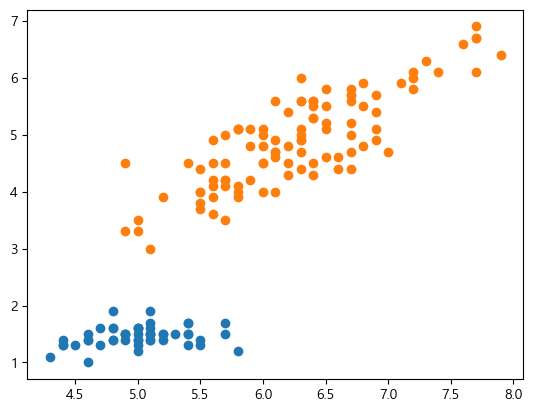

In [20]:
plt.figure()

# plt.scatter(X[:,0], X[:,1])
plt.scatter(X[np.ravel([Y == -1]),0], X[np.ravel([Y == -1]),1])
plt.scatter(X[np.ravel([Y == 1]),0], X[np.ravel([Y == 1]),1])

plt.show()

### Perceptron

In [21]:
class Perceptron(object): 
    """Perceptron classifier.

    Parameters
    ------------
    eta : float
      Learning rate (between 0.0 and 1.0)
    n_iter : int
      Passes over the training dataset.
    random_state : int
      Random number generator seed for random weight
      initialization.

    Attributes
    -----------
    w_ : 1d-array
      Weights after fitting.
    errors_ : list
      Number of misclassifications (updates) in each epoch.

    """
    def __init__(self, eta=0.01, n_iter=50, shuffle=False, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.shuffle = shuffle
        self.random_state = random_state

    def fit(self, X, y):
        """Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
          Training vectors, where n_samples is the number of samples and
          n_features is the number of features.
        y : array-like, shape = [n_samples]
          Target values.

        Returns
        -------
        self : object

        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            if self.shuffle:
                X, y = self._shuffle(X, y)
                
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = np.random.permutation(len(y))
        return X[r], y[r]

    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [22]:
perc = Perceptron(eta = 0.1, n_iter = 10, shuffle = True)
perc.fit(X, Y)

In [23]:
perc.errors_

[9, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [24]:
perc.w_

array([-0.18375655, -0.68611756,  1.77471828])

### Scatter Plot 2

In [25]:
from matplotlib.colors import ListedColormap

In [26]:
def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    #print(xx1)
    #print(xx2)
    #print(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[np.ravel([y == cl]), 0],
                    y=X[np.ravel([y == cl]), 1],
                    alpha=0.8,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx], 
                    label=cl)
    plt.xlabel('sepal length(cm)')
    plt.ylabel('petal length(cm)')

    plt.legend()
    plt.show()

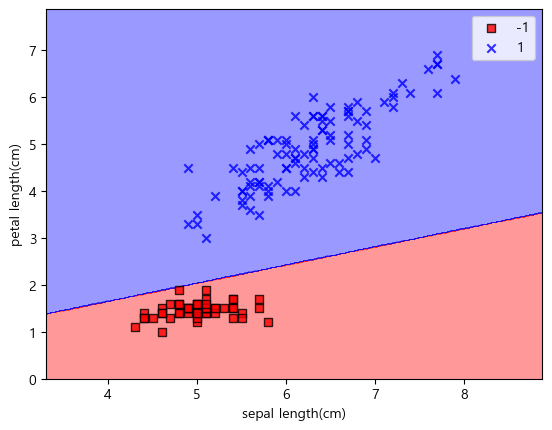

In [27]:
plot_decision_regions(X, Y, perc)